### Import necessary libraries for building, training, and testing a CNN model.

In [10]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


### Load training data from the specified directory and retrieve class labels.

In [11]:
train_dir="./images/train"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())
classes

Found 2171 images belonging to 6 classes.


['Aderajew', 'Betty', 'Biruk', 'Maddy', 'Tinsae', 'Yohannes']

In [12]:
def load_human_detection_model():
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  

    model = Sequential([
        base_model,  
        GlobalAveragePooling2D(), 
        Dense(128, activation='relu'),
        Dropout(0.5), 
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load human detection model using MobileNetV2
human_detector = load_human_detection_model()

### Define a CNN architecture with Conv2D layers, max pooling, batch normalization, dropout, and dense layers.

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

### Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric, and display the model summary.

In [14]:
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy']
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,846 (952.52 KB)

 Trainable params: 243,270 (950.27 KB)

 Non-trainable params: 576 (2.25 KB)

### Train the model using the training dataset for 30 epochs with a batch size of 32.

In [15]:
model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7084 - loss: 0.8843
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9814 - loss: 0.0583
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 990ms/step - accuracy: 0.9966 - loss: 0.0188
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 998ms/step - accuracy: 0.9998 - loss: 0.0071
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 995ms/step - accuracy: 0.9984 - loss: 0.0079
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 993ms/step - accuracy: 0.9926 - loss: 0.0271
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9902 - loss: 0.0339
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9984 - loss: 0.0101
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9810 - loss: 0.0500
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9943 - loss: 0.0205
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9985 - loss: 0.0046
Epoch 12/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 998ms/step - accura

### Save the trained model and then load it

In [16]:
model.save("FR_model.keras")
model = load_model('FR_model.keras', compile=False)

### Load a pre-trained Keras model, export to SavedModel format, convert to TFLite, and save.

In [17]:
tf_model = load_model('FR_model.keras', compile=False)
# Export the model to SavedModel format
tf_model.export('saved_model_format')


# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_format')
tflite_model = converter.convert()
# Save the TFLite model
with open('FR_model_lite.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model converted to TFLite and saved as 'FR_model.keras'.")
tf_model.summary()

INFO:tensorflow:Assets written to: saved_model_format\assets


INFO:tensorflow:Assets written to: saved_model_format\assets


Saved artifact at 'saved_model_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2761165823184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165823568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165824144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165824336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165821456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165823760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165825104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165826256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165826640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165824720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761165825488: TensorSpec(shape

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,846 (952.52 KB)

 Trainable params: 243,270 (950.27 KB)

 Non-trainable params: 576 (2.25 KB)

### Test a TFLite model with multiple images, preprocessing the input, running inference, and displaying predictions.

In [24]:

# Load the TFLite model for face recognition
def test_tflite_model(image_path):
    print("Testing TFLite model...")

    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path="FR_model_lite.tflite")
    interpreter.allocate_tensors()
    
    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Preprocess the input image
    img = image.load_img(image_path, target_size=(224,224))
    input_data = np.expand_dims(image.img_to_array(img), axis=0).astype(np.float32)

    # Verify input shape and type
    print("Input shape:", input_data.shape)
    print("Expected shape:", input_details[0]['shape'])
    print("Input type:", input_data.dtype)
    print("Expected type:", input_details[0]['dtype'])

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print("Raw output:", output_data)  # Debug raw probabilities
    predicted_class = np.argmax(output_data)
    print(f"PredictedIndex: {predicted_class}")
    print(f"Predicted class: {classes[predicted_class]}")

# Human vs Object detection (using MobileNetV2)
def detect_and_recognize(image_path):
    print("Classifying image as Human or Object...")

    # Preprocess image for human detection
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to 224x224
    input_data = np.expand_dims(image.img_to_array(img), axis=0).astype(np.float32)

    # Predict whether it is human or object
    prediction = human_detector.predict(input_data)
    print("Prediction:", prediction)
    
    # Assuming threshold of 0.5 for sigmoid output (1: Human, 0: Object)
    if prediction >= 0.3:
        print("Human detected.")
        test_tflite_model(image_path)  # Proceed to face recognition if human
    else:
        print("Object detected. Not proceeding to face recognition.")

# Test with the images
detect_and_recognize("./images/test/betty/betty_7.jpg")
detect_and_recognize("./images/test/Biruk/biruk_11.jpg")
detect_and_recognize("./images/test/Biruk/biruk_6.jpg")
detect_and_recognize("./images/test/betty/betty_2.jpg")
detect_and_recognize("./images/test/Yohannes/yo_9.jpg")
detect_and_recognize("./images/test/Tinsae/tin_11.jpg")
detect_and_recognize("./images/test/Tinsae/tin_9.jpg")
detect_and_recognize("./images/test/Yohannes/yo_16.jpg")
detect_and_recognize("./images/test/Maedot/maddy_12.jpg")
detect_and_recognize("./images/test/Aderajew/ade_4.jpg")

Classifying image as Human or Object...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction: [[0.41265282]]
Human detected.
Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expected shape: [  1 224 224   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[8.8956490e-02 3.8854653e-04 6.5183296e-04 8.2528830e-01 7.2261170e-02
  1.2453616e-02]]
PredictedIndex: 3
Predicted class: Maddy
Classifying image as Human or Object...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: [[0.3965325]]
Human detected.
Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expected shape: [  1 224 224   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[7.4004006e-06 1.6279124e-05 1.1238217e-04 7.9991907e-01 1.9993553e-01
  9.4049083e-06]]
PredictedIndex: 3
Predicted class: Maddy
Classifying image as Human or Object...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: [[0.32542947]]
Human detected.
Testing TFLite model...
Input shape: (1, 224, 224, 3)
Expe

### Predict the class of a given image using a trained model and display the result.

In [28]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Predicted: "+classes[np.argmax(pred)])

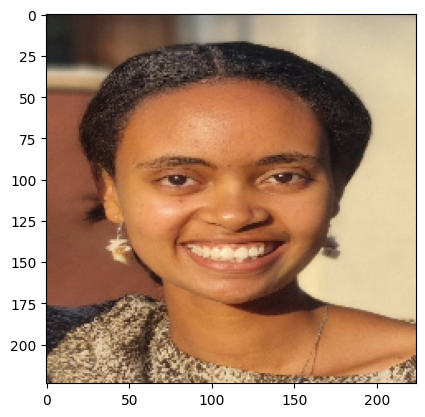

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted: Maddy


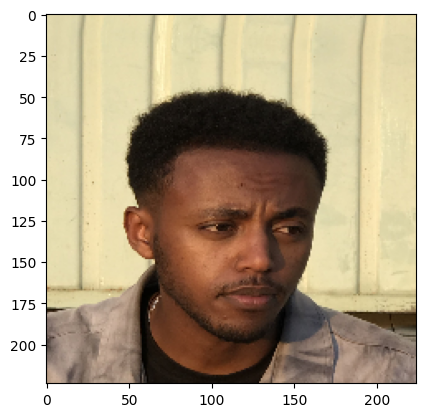

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted: Biruk


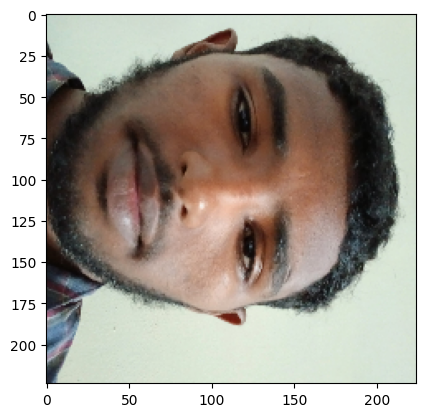

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted: Tinsae


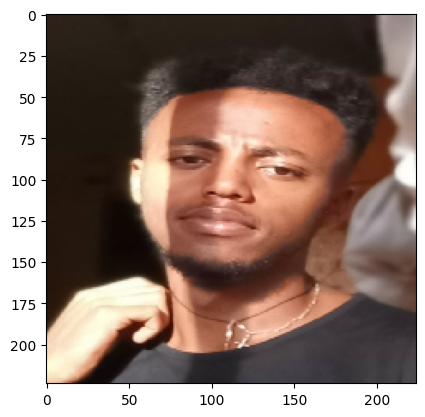

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: Maddy


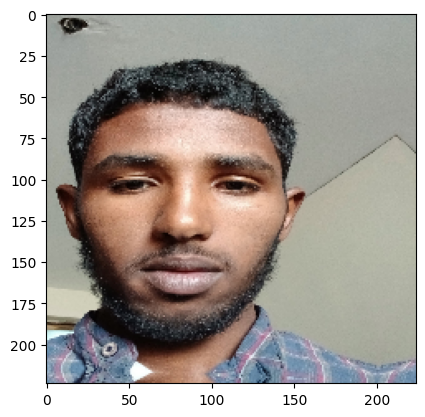

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted: Aderajew


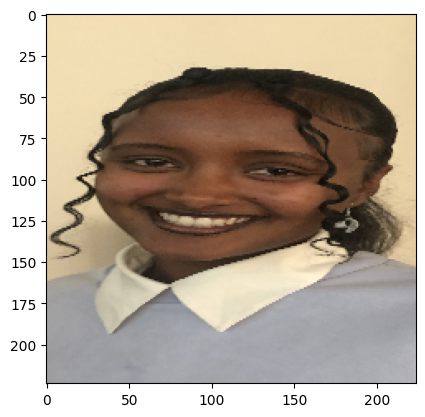

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted: Tinsae


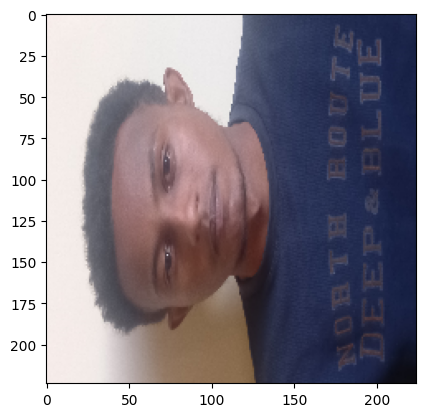

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted: Yohannes


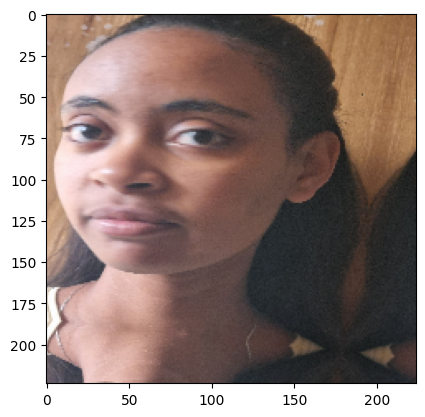

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: Betty


In [29]:
predict_image("./images/test/Betty/betty_2.jpg")
predict_image("./images/test/Biruk/biruk_2.jpg")
predict_image("./images/test/Aderajew/ade_4.jpg")
predict_image("./images/test/Biruk/biruk_11.jpg")
predict_image("./images/test/Aderajew/ade_2.jpg")
predict_image("./images/test/Tinsae/tin_11.jpg")
predict_image("./images/test/Yohannes/yo_16.jpg")
predict_image("./images/test/Betty/betty_4.jpg")